# Group 11: Phase 2 - Multi-Task Object Detection and Localization for Cats and Dogs (CaDoD)

## Team Members

Kangle Li, kl66@iu.edu <br>
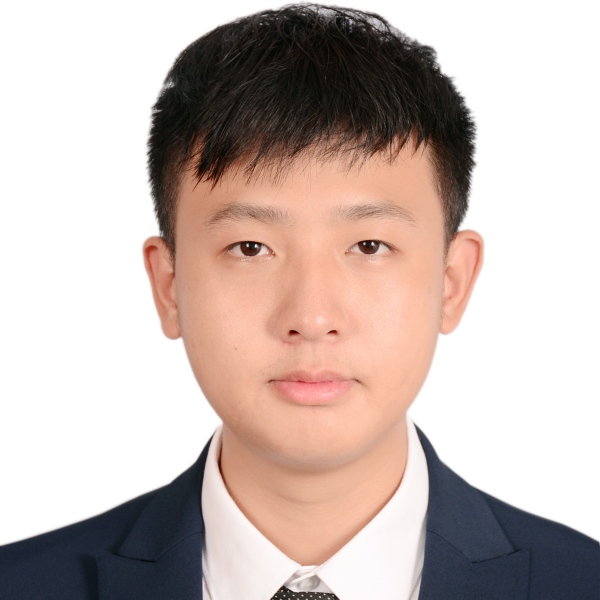

Genevieve Mortensen, gamorten@iu.edu <br>
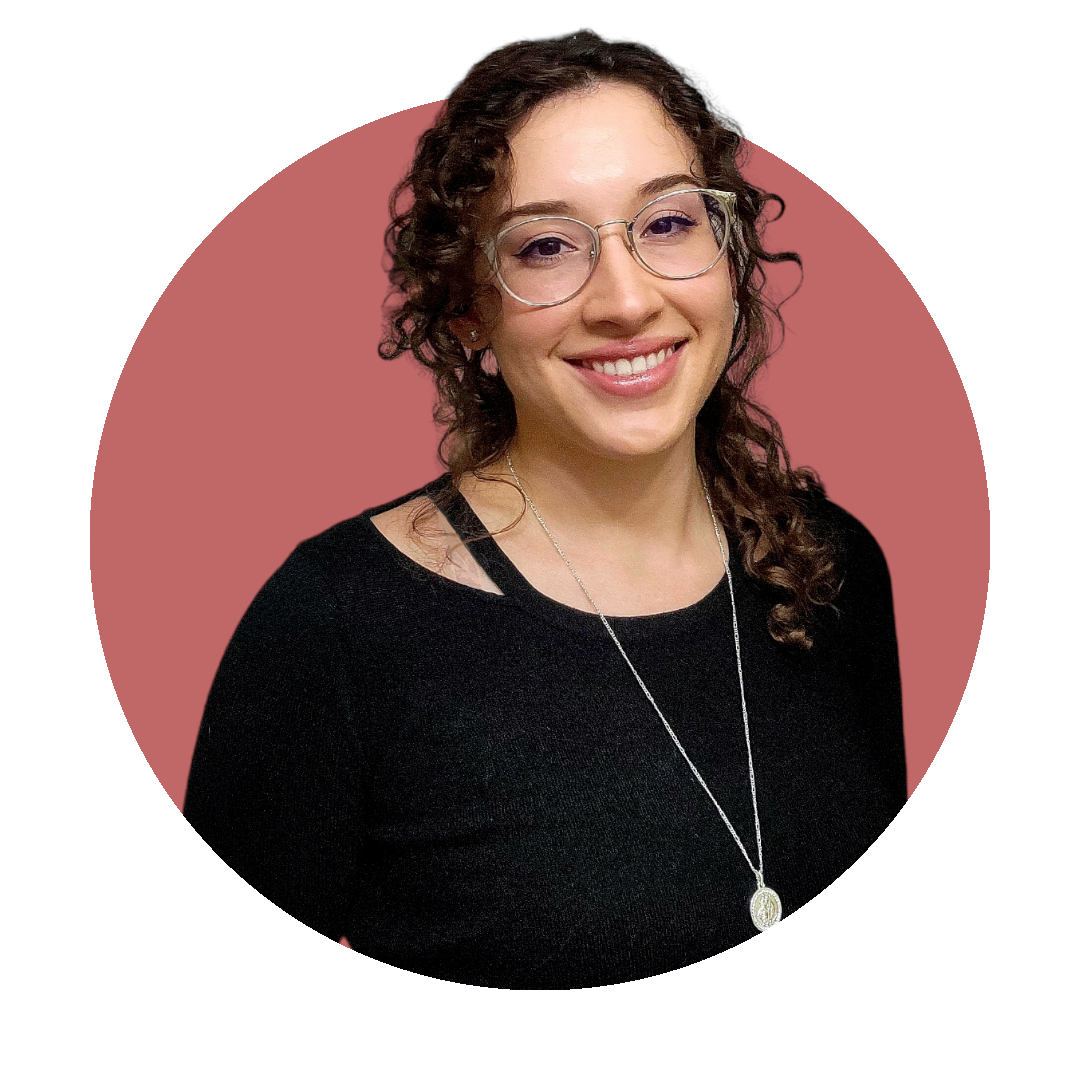

Sean Dixit, sedixit@iu.edu <br>
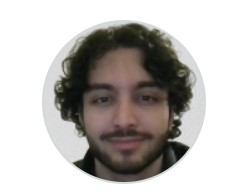

[Phase Leader Plan](https://docs.google.com/spreadsheets/d/1_yx1fk4EERuvBahTunbggOWZ7RtZmK8I5IZ6OzbBtX0/edit#gid=0) <br>
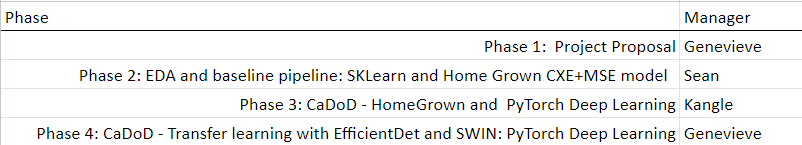

[Credit Assignment Plan](https://docs.google.com/spreadsheets/d/1_yx1fk4EERuvBahTunbggOWZ7RtZmK8I5IZ6OzbBtX0/edit#gid=0) <br>
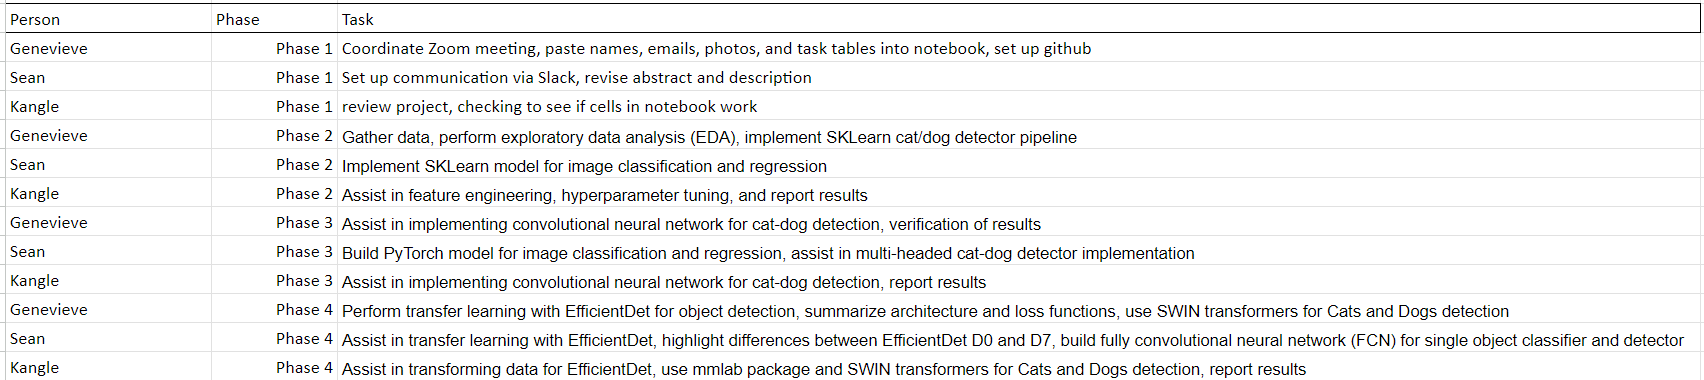

Gantt Diagram <br>
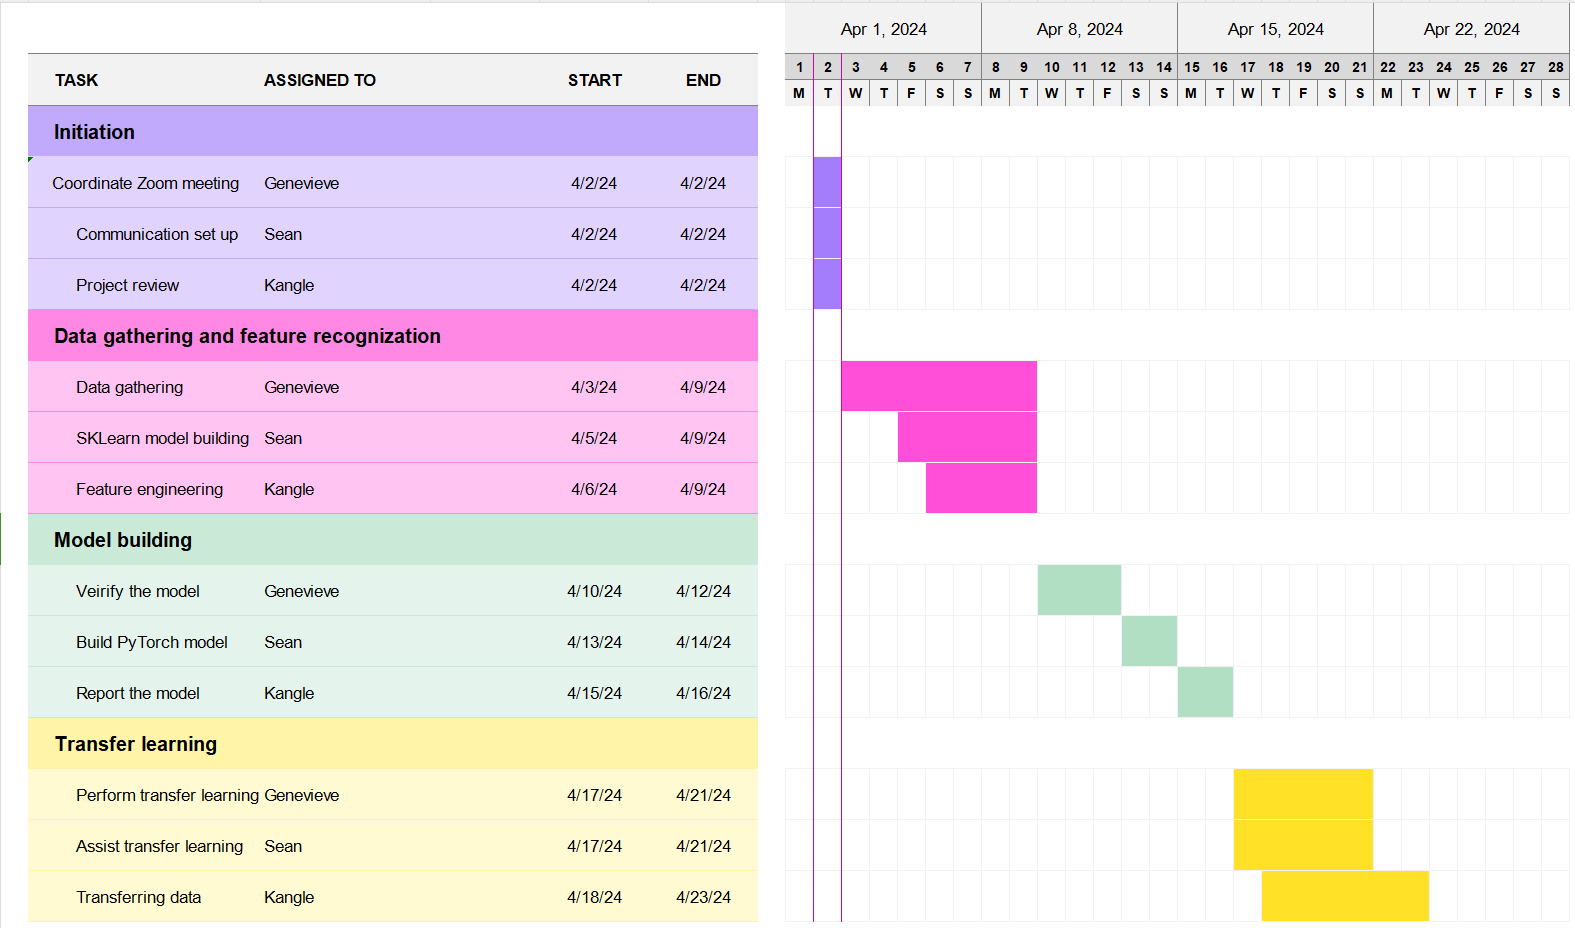

## Project Report

### Abstract

Our project revolves around the development of robust models for cat and dog detection (CaDoD) using various machine learning techniques. Addressing the challenges of object detection and localization, we aim to enhance the accuracy and efficiency of identifying cats and dogs within images. In this phase, we aim to lay the groundwork for our project by establishing baseline pipelines using scikit-learn and homegrown models. We will conduct exploratory data analysis (EDA), build models for image classification and regression, and evaluate their performance using appropriate metrics such as accuracy and mean squared error (MSE).

In this phase, we first analyzed the images in our dataset by various means, including computing the number of images, shape of the images, number of dog vs cat class images and plotting random images with bounding boxes. We then rescaled the images and created a baseline SGDClassifier model (for classifying dog vs cat) and a Linear Regression model (for bounding box labelling). We used accuracy as our metric for performance for the classifier, and MSE as our metric for the linear regression model. 

Upon looking at the results of our experiments, we saw that _ outperformed all other models for cat/dog detection, which achieved a score of _. ######################TODO########################


### Introduction
In our project, we take on the challenging task of classifying cat vs dog pictures and create bounding boxes around them. Our goal is to develop robust models capable of accurately identifying and localizing cats and dogs in images. The purpose of this project is create an end to end pipeline in machine learning to create an object detector for cats and dogs. There are about 13,000 images of varying shapes and aspect ratios. They are all RGB images and have bounding box coordinates stored in a .csv file. In order to create a detector, we will first have to preprocess the images to be all of the same shapes, take their RGB intensity values and flatten them from a 3D array to 2D. Then we will feed this array into a linear classifier and a linear regressor to predict labels and bounding boxes.

### Dataset
The dataset we've opted for is a subset of the Open Images Dataset V6, a comprehensive collection of labeled images spanning various categories.  It contains millions of labeled images spanning a wide variety of categories including cat and dog images, making it a valuable resource for training and evaluating object detection machine learning models. Our subset specifically focuses on images featuring cats and dogs as the primary subjects, with accompanying bounding box annotations indicating the precise location of each animal within the image. Our subset will have 12,866 images of dogs and cats. Each image is supplemented with metadata such as dimensions, file paths, and class labels, facilitating efficient model training and evaluation. The vastness of the dataset ensures a rich diversity of images capturing different breeds, poses, and environments, providing ample variation for robust model training.

We will be using a subset of the Open Images Dataset V6. It is a large-scale dataset curated by Google designed to facilitate computer vision research and development. It contains millions of labeled images spanning a wide variety of categories, making it a valuable resource for training and evaluating machine learning models. Our subset will have 12,866 images of dogs and cats.

The image archive `cadod.tar.gz` is a subset [Open Images V6](https://storage.googleapis.com/openimages/web/download.html). It contains a total of 12,966 images of dogs and cats.


Image bounding boxes are stored in the csv file `cadod.csv`. The following describes whats contained inside the csv.

* ImageID: the image this box lives in.
* Source: indicates how the box was made:
    * xclick are manually drawn boxes using the method presented in [1], were the annotators click on the four extreme points of the object. In V6 we release the actual 4 extreme points for all xclick boxes in train (13M), see below.
    * activemil are boxes produced using an enhanced version of the method [2]. These are human verified to be accurate at IoU>0.7.
* LabelName: the MID of the object class this box belongs to.
* Confidence: a dummy value, always 1.
* XMin, XMax, YMin, YMax: coordinates of the box, in normalized image coordinates. XMin is in [0,1], where 0 is the leftmost pixel, and 1 is the rightmost pixel in the image. Y coordinates go from the top pixel (0) to the bottom pixel (1).
* XClick1X, XClick2X, XClick3X, XClick4X, XClick1Y, XClick2Y, XClick3Y, XClick4Y: normalized image coordinates (as XMin, etc.) of the four extreme points of the object that produced the box using [1] in the case of xclick boxes. Dummy values of -1 in the case of activemil boxes.

The attributes have the following definitions:

* IsOccluded: Indicates that the object is occluded by another object in the image.
* IsTruncated: Indicates that the object extends beyond the boundary of the image.
* IsGroupOf: Indicates that the box spans a group of objects (e.g., a bed of flowers or a crowd of people). We asked annotators to use this tag for cases with more than 5 instances which are heavily occluding each other and are physically touching.
* IsDepiction: Indicates that the object is a depiction (e.g., a cartoon or drawing of the object, not a real physical instance).
* IsInside: Indicates a picture taken from the inside of the object (e.g., a car interior or inside of a building).
For each of them, value 1 indicates present, 0 not present, and -1 unknown.

### Pipelines

#### Stochastic Gradient Descent Classifier (SGDC) as Baseline

Before delving into our custom implementations, it's important to establish the Stochastic Gradient Descent Classifier (SGDC) as our baseline model. SGDC, a linear regressor widely used for classification tasks, offers a robust point of comparison for our more specialized models. Its efficiency and simplicity make SGDC an excellent linear regression baseline for large data, against which the performance and complexity of our homegrown models can be evaluated.

#### Multi-Output Linear Regression

Linear Regression is a fundamental algorithm in machine learning for predicting continuous values. In our custom model, we extend this concept to predict multiple outputs at once, targeting scenarios where we need to predict four related values, such as the coordinates of a bounding box in an image (x, y, width, height). This extension aims to improve upon the baseline by offering predictions that are not just categorical but spatially informative as well.

#### Multi-Task Logistic Regression

Similarly, Logistic Regression, typically used for binary classification tasks like Cats vs Dogs, is extended in our custom model to perform multi-task learning. This model is not only tasked with classifying input data into categories but also with predicting additional continuous values, such as bounding box coordinates. This approach seeks to provide a more comprehensive understanding of the input data, surpassing the baseline SGDC's capabilities by adding a layer of regression to the classification task.

### Metrics

#### Performance Metric: Accuracy

For all our machine learning pipelines, we evaluate performance primarily through the metric of accuracy. Accuracy is defined as the proportion of true results (both true positives and true negatives) among the total number of cases examined. Mathematically, it is expressed as:

$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$

where:
- $TP$ = True Positives
- $TN$ = True Negatives
- $FP$ = False Positives
- $FN$ = False Negatives

Accuracy provides a straightforward measure of how well our model correctly identifies or predicts the target variable.

#### SGD Classifier Pipeline: Utilizing MSE

For our Stochastic Gradient Descent Classifier (SGDC) pipeline, we employ the Mean Squared Error (MSE) as a specific performance metric. MSE measures the average squared difference between the estimated values and the actual value, offering insight into the precision of continuous value prediction within our classification process. MSE is given by:

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

where:
- $n$ is the number of samples,
- $y_i$ is the actual value of the $i^{th}$ sample,
- $\hat{y}_i$ is the predicted value for the $i^{th}$ sample.

This formula allows us to quantify the deviation of the predicted continuous values from their actual values, thus offering a nuanced understanding of the model's predictive accuracy, especially in tasks where precision in the continuous output space is crucial.

#### Multi-Output Linear Regression Loss Function: Mean Squared Error (MSE)

The Mean Squared Error (MSE) is a common loss function used in regression, measuring the average squared difference between estimated values and the actual value. For a multi-output scenario, the MSE is calculated for each target independently and then averaged. The equation for MSE when extending to four targets is given by:

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{1}{4} \sum_{j=1}^{4} (y_{ij} - \hat{y}_{ij})^2 \right) $$

where $n$ is the number of samples, $y_{ij}$ is the actual value for the $j^{th}$ target of the $i^{th}$ sample, and $\hat{y}_{ij}$ is the predicted value for the $j^{th}$ target of the $i^{th}$ sample.

#### Loss Function: Cross-Entropy + Mean Squared Error

To accommodate the dual objectives of classification and regression, we combine the Cross-Entropy (CXE) loss for the classification task with the Mean Squared Error (MSE) loss for the regression task. The total loss is a weighted sum of these two losses:

$$ Total Loss = \lambda \cdot CXE + (1 - \lambda) \cdot MSE $$

where $\lambda$ is a hyperparameter that balances the contribution of each loss component.


### EDA
![image-4.png](attachment:image-4.png)

In this phase, we first analyzed the images in our dataset (i.e a subset of the Open Images Dataset V6) by various means, including computing the number of images, shape of the images dataframe, number of dog vs cat class images, size of the dataset and number of image aspect ratio types. We also changed the label names to human readable labels.

Upon analysis of the dataset, we found that it contains 12966 images in total (of dogs and cats), with a total size of 844.512 MB. The number of dog images outweighed the number of cat images, as there were 6855 dog images and 6111 cat images. We also plotted the different aspect ratios of images in the dataset as there were many different types of aspect ratios present in the dataset. We found that the most common aspect ratio was 512x384. We filtered image shapes with count less than 100 into a separate category called other to simplify the processing. 

We then plotted 6 random images using matplotlib along with their corresponding bounding boxes. We rescaled the images to 128x128 aspect ratio to standardize the images and save space/time for storing and processing.  

Before resizing: (notice how they are rectangular)
![image.png](attachment:image.png)

After resizing to 128x128 aspect ratio:
![image-2.png](attachment:image-2.png)


### Experiments
##############################TODO##############################

### Discussion
Our decision-making process involved several key considerations aimed at laying the groundwork for our project. We opted for a subset of the Open Images Dataset V6, focusing specifically on images featuring cats and dogs. This dataset choice provided a diverse collection of annotated images, essential for training robust object detection models. EDA was conducted to gain insights into the dataset's characteristics, such as image distribution, class balance, and aspect ratios. This analysis guided our preprocessing steps and model selection. For preprocessing, we resized the images to a standard resolution of 128x128 pixels, which was essential for standardizing inputs across different models and reducing computational overhead during training and inference. We employed scikit-learn's SGDClassifier for image classification and a Linear Regression model for bounding box labeling as baseline models. These choices were made considering their simplicity and suitability for initial experimentation. The metrics chosen for evaluation, namely accuracy for image classification and mean squared error (MSE) for bounding box regression, were selected as they are both widely used for their respective tasks and they are relatively simple to implement and understand. 

###############################TODO############################ 

### Conclusion
Our project focuses on the development of robust models for cat and dog detection (CaDoD), aiming to accurately classify images containing these animals and precisely localize their bounding boxes. This task holds significant importance in various real-world applications, including wildlife conservation, pet monitoring, and security surveillance.

Our hypothesis posited that machine learning pipelines with custom features can effectively accomplish the task of cat and dog detection and classification. Throughout the project, we conducted thorough exploratory data analysis, implemented baseline models using scikit-learn and custom approaches, and evaluated their performance using relevant metrics. Our results demonstrated promising performance, with our baseline models achieving competitive accuracy scores and MSE values.

The significance of our results lies in laying the groundwork for more advanced techniques and methodologies in subsequent project phases. Moving forward, we envision incorporating deep learning models such as CNNs, EfficientNets and SWIN transformers and further refining our models to achieve higher accuracy in cat and dog detection/classification.

### Bibliography
None


In [16]:
from collections import Counter
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split
import tarfile
from tqdm.notebook import tqdm
import warnings

# Import Data

### Unarchive data

In [20]:
def extract_tar(file, path):
    """
    function to extract tar.gz files to specified location
    
    Args:
        file (str): path where the file is located
        path (str): path where you want to extract
    """
    with tarfile.open(file) as tar:
        files_extracted = 0
        for member in tqdm(tar.getmembers()):
            if os.path.isfile(path + member.name[1:]):
                continue
            else:
                tar.extract(member, path)
                files_extracted += 1
        tar.close()
        if files_extracted < 3:
            print('Files already exist')

In [21]:
path = '../images'

In [22]:
extract_tar('cadod.tar.gz', path)

  0%|          | 0/25936 [00:00<?, ?it/s]

In [23]:
print(os.listdir())

['.DS_Store', '.git', '.ipynb_checkpoints', '._', '._.DS_Store', 'cadod.csv', 'cadod.tar.gz', 'CaDoD_Phase_2_baseline_SKLearn_homegrown.ipynb', 'data', 'Efficient_Det_train_on_shape_data.ipynb', 'Group11_Phase1.html', 'Group11_Phase1.ipynb', 'Group11_Phase2_jupyter.ipynb', 'Project gantt diagram.PNG', 'README.md', 'Shape_detector_via_EfficientDet.md', 'temp.txt']


### Load bounding box meta data

In [24]:
import pandas as pd
df = pd.read_csv('cadod.csv')

In [25]:
df.head()

ImageID  Source  LabelName  Confidence      XMin      XMax  \
0  0000b9fcba019d36  xclick  /m/0bt9lr           1  0.165000  0.903750   
1  0000cb13febe0138  xclick  /m/0bt9lr           1  0.000000  0.651875   
2  0005a9520eb22c19  xclick  /m/0bt9lr           1  0.094167  0.611667   
3  0006303f02219b07  xclick  /m/0bt9lr           1  0.000000  0.999219   
4  00064d23bf997652  xclick  /m/0bt9lr           1  0.240938  0.906183   

       YMin      YMax  IsOccluded  IsTruncated  ...  IsDepiction  IsInside  \
0  0.268333  0.998333           1            1  ...            0         0   
1  0.000000  0.999062           1            1  ...            0         0   
2  0.055626  0.998736           1            1  ...            0         0   
3  0.000000  0.998824           1            1  ...            0         0   
4  0.000000  0.694286           0            0  ...            0         0   

   XClick1X  XClick2X  XClick3X  XClick4X  XClick1Y  XClick2Y  XClick3Y  \
0  0.636250  0.903750  0.748750  0.165000  0.268333  0.506667  0.998333   
1  0.312500  0.000000  0.317500  0.651875  0.000000  0.410882  0.999062   
2  0.487500  0.611667  0.243333  0.094167  0.055626  0.226296  0.998736   
3  0.508594  0.999219  0.000000  0.478906  0.000000  0.375294  0.720000   
4  0.678038  0.906183  0.240938  0.522388  0.000000  0.370000  0.424286   

   XClick4Y  
0  0.661667  
1  0.999062  
2  0.305942  
3  0.998824  
4  0.694286  

[5 rows x 21 columns]

# Exploratory Data Analysis

## Statistics

In [26]:
print(f"There are a total of {len(glob.glob1(path, '*.jpg'))} images")

There are a total of 12966 images


In [27]:
print(f"The total size is {os.path.getsize(path)/1000} MB")

The total size is 9437.184 MB


In [28]:
df.shape

(12966, 21)

Replace `LabelName` with human readable labels

In [29]:
df.LabelName.replace({'/m/01yrx':'cat', '/m/0bt9lr':'dog'}, inplace=True)

In [30]:
df.LabelName.value_counts()

LabelName
dog    6855
cat    6111
Name: count, dtype: int64

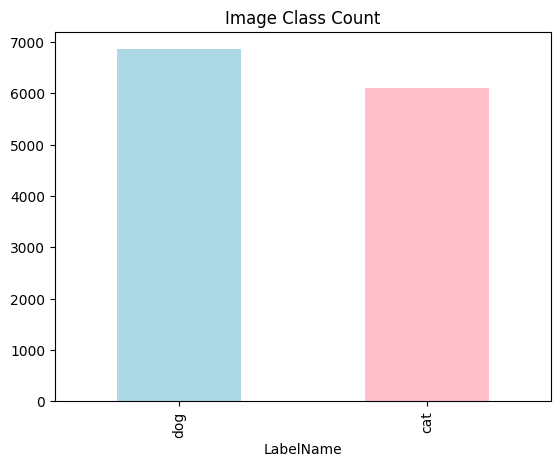

In [31]:
df.LabelName.value_counts().plot(kind='bar', color=['lightblue', 'pink'])
plt.title('Image Class Count')
plt.show()

In [32]:
df.describe()

Confidence          XMin          XMax          YMin          YMax  \
count     12966.0  12966.000000  12966.000000  12966.000000  12966.000000   
mean          1.0      0.099437      0.901750      0.088877      0.945022   
std           0.0      0.113023      0.111468      0.097345      0.081500   
min           1.0      0.000000      0.408125      0.000000      0.451389   
25%           1.0      0.000000      0.830625      0.000000      0.910000   
50%           1.0      0.061250      0.941682      0.059695      0.996875   
75%           1.0      0.167500      0.998889      0.144853      0.999062   
max           1.0      0.592500      1.000000      0.587088      1.000000   

         IsOccluded   IsTruncated     IsGroupOf   IsDepiction      IsInside  \
count  12966.000000  12966.000000  12966.000000  12966.000000  12966.000000   
mean       0.464754      0.738470      0.013651      0.045427      0.001157   
std        0.499239      0.440011      0.118019      0.209354      0.040229   
min       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.000000      0.000000      0.000000   
75%        1.000000      1.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           XClick1X      XClick2X      XClick3X      XClick4X      XClick1Y  \
count  12966.000000  12966.000000  12966.000000  12966.000000  12966.000000   
mean       0.390356      0.424582      0.494143      0.506689      0.275434   
std        0.358313      0.441751      0.405033      0.462281      0.415511   
min       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%        0.221292      0.096875      0.285071      0.130000      0.024323   
50%        0.435625      0.415625      0.531919      0.623437      0.146319   
75%        0.609995      0.820000      0.787500      0.917529      0.561323   
max        0.999375      0.999375      1.000000      0.999375      0.999375   

           XClick2Y      XClick3Y      XClick4Y  
count  12966.000000  12966.000000  12966.000000  
mean       0.447448      0.641749      0.582910  
std        0.401580      0.448054      0.403454  
min       -1.000000     -1.000000     -1.000000  
25%        0.218333      0.405816      0.400000  
50%        0.480838      0.825000      0.646667  
75%        0.729069      0.998042      0.882500  
max        0.999375      1.000000      0.999375

## Sample of Images

C:\Users\genev\AppData\Local\Temp\ipykernel_24984\88787746.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[i].add_patch(plt.Rectangle((coords[0]*w, coords[2]*h),
C:\Users\genev\AppData\Local\Temp\ipykernel_24984\88787746.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coords[1]*w-coords[0]*w, coords[3]*h-coords[2]*h,


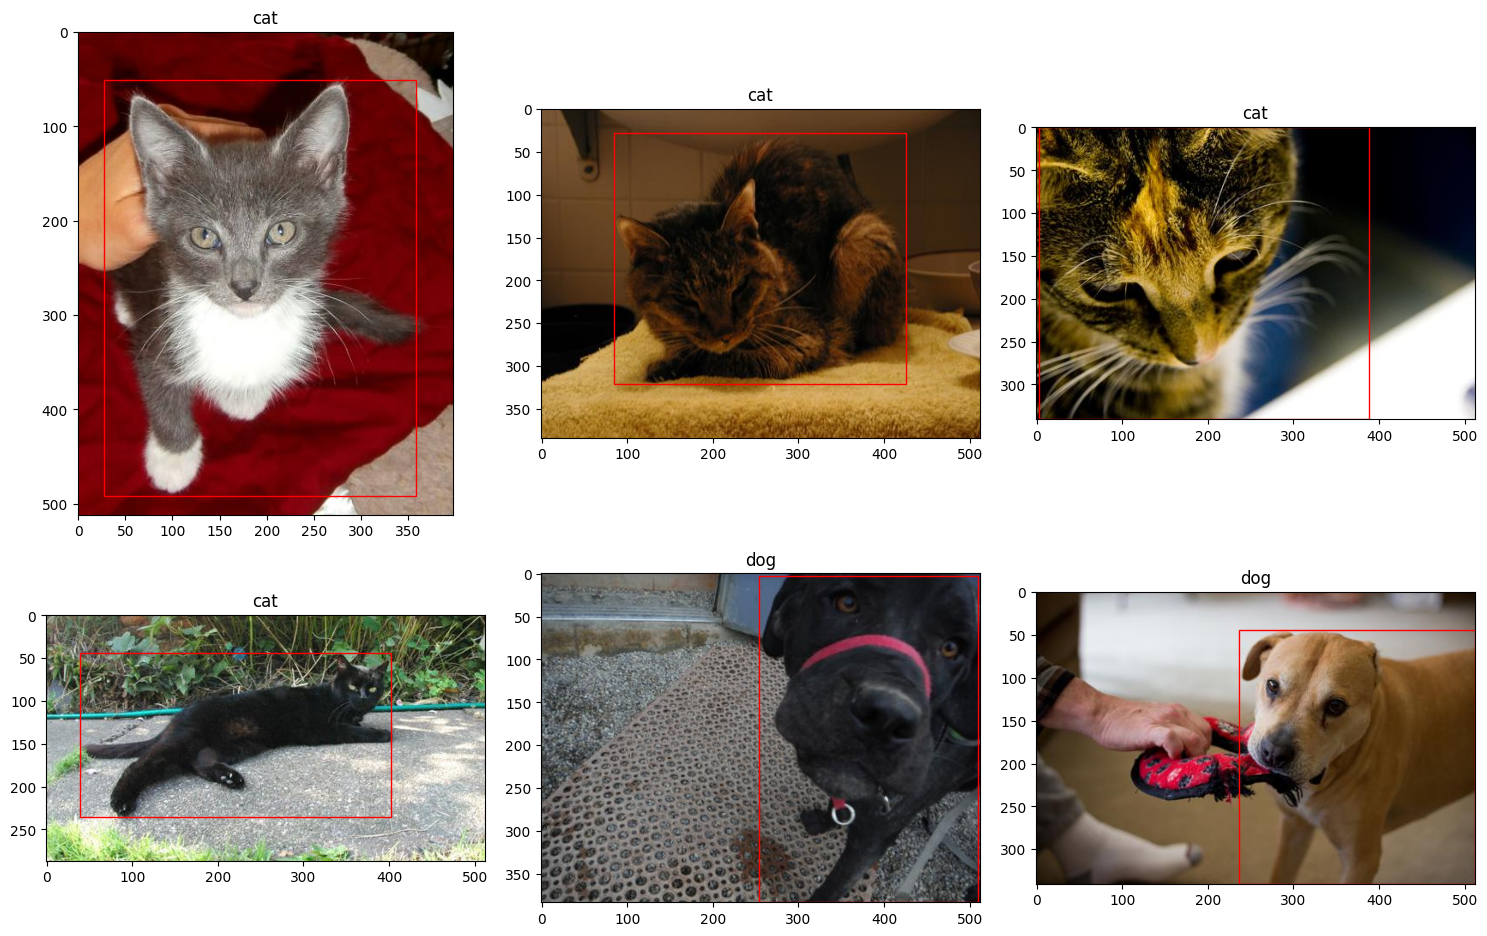

In [33]:
# plot random 6 images
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False,figsize=(15,10))
ax = ax.flatten()

for i,j in enumerate(np.random.choice(df.shape[0], size=6, replace=False)):
    img = mpimg.imread(path + '/' + df.ImageID.values[j] + '.jpg')
    h, w = img.shape[:2]
    coords = df.iloc[j,4:8]
    ax[i].imshow(img)
    ax[i].set_title(df.LabelName[j])
    ax[i].add_patch(plt.Rectangle((coords[0]*w, coords[2]*h), 
                                  coords[1]*w-coords[0]*w, coords[3]*h-coords[2]*h, 
                                  edgecolor='red', facecolor='none'))

plt.tight_layout()
plt.show()

## Image shapes and sizes

Go through all images and record the shape of the image in pixels and the memory size

In [34]:
img_shape = []
img_size = np.zeros((df.shape[0], 1))

for i,f in enumerate(tqdm(glob.glob1(path, '*.jpg'))):
    file = path+'/'+f
    img = Image.open(file)
    img_shape.append(f"{img.size[0]}x{img.size[1]}")
    img_size[i] += os.path.getsize(file)

  0%|          | 0/12966 [00:00<?, ?it/s]

Count all the different image shapes

In [35]:
img_shape_count = Counter(img_shape)

In [36]:
# create a dataframe for image shapes
img_df = pd.DataFrame(set(img_shape_count.items()), columns=['img_shape','img_count'])

In [37]:
img_df.shape

(594, 2)

There are a ton of different image shapes. Let's narrow this down by getting a sum of any image shape that has a cout less than 100 and put that in a category called `other`

In [38]:
new_row = pd.DataFrame({'img_shape': ['other'], 'img_count': [img_df[img_df.img_count < 100].img_count.sum()]})
img_df = pd.concat([img_df, new_row], ignore_index=True)


Drop all image shapes

In [39]:
img_df = img_df[img_df.img_count >= 100]

Check if the count sum matches the number of images

In [40]:
img_df.img_count.sum() == df.shape[0]

True

Plot

## Plot aspect ratio

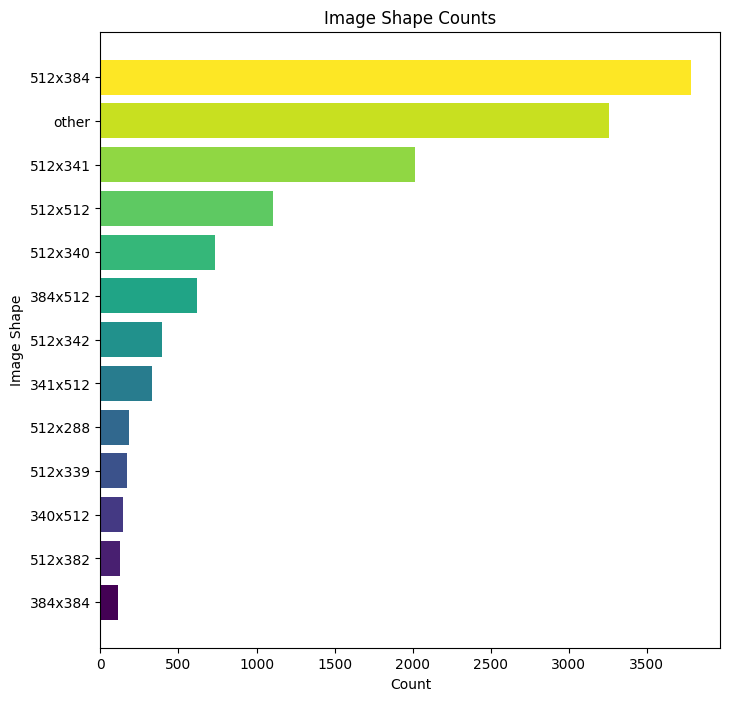

In [41]:
img_df.sort_values('img_count', inplace=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(img_df)))
plt.figure(figsize=(8, 8))
bars = plt.barh(img_df['img_shape'], img_df['img_count'], color=colors)
plt.title('Image Shape Counts')
plt.xlabel('Count')
plt.ylabel('Image Shape')
plt.show()


In [42]:
# convert to megabytes
img_size = img_size / 1000

The image size distribution is very obviously skewed. The data requires preprocessing.

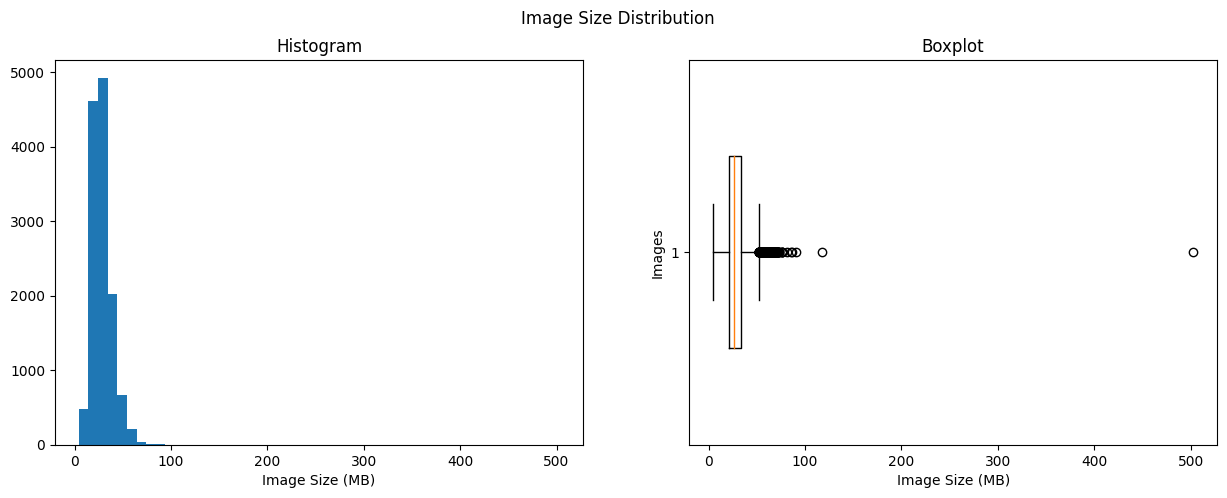

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Image Size Distribution')
ax[0].hist(img_size, bins=50)
ax[0].set_title('Histogram')
ax[0].set_xlabel('Image Size (MB)')
ax[1].boxplot(img_size, vert=False, widths=0.5)
ax[1].set_title('Boxplot')
ax[1].set_xlabel('Image Size (MB)')
ax[1].set_ylabel('Images')
plt.show()

# Preprocess

## Rescale the images

In [44]:
# !mkdir ./images/resized

In [47]:
%%time
# resize image and save, convert to numpy

img_arr = np.zeros((df.shape[0],128*128*3)) # initialize np.array

for i, f in enumerate(tqdm(df.ImageID)):
    img = Image.open(path + '/' + f + '.jpg')
    img_resized = img.resize((128,128))
    img_resized.save("../images/resized/"+f+'.jpg', "JPEG", optimize=True)
    img_arr[i] = np.asarray(img_resized, dtype=np.uint8).flatten()

  0%|          | 0/12966 [00:00<?, ?it/s]

CPU times: total: 50.3 s
Wall time: 1min 53s


Plot the resized and filtered images

C:\Users\genev\AppData\Local\Temp\ipykernel_24984\245110220.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[i].add_patch(plt.Rectangle((coords[0]*w, coords[2]*h),
C:\Users\genev\AppData\Local\Temp\ipykernel_24984\245110220.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coords[1]*w-coords[0]*w, coords[3]*h-coords[2]*h,


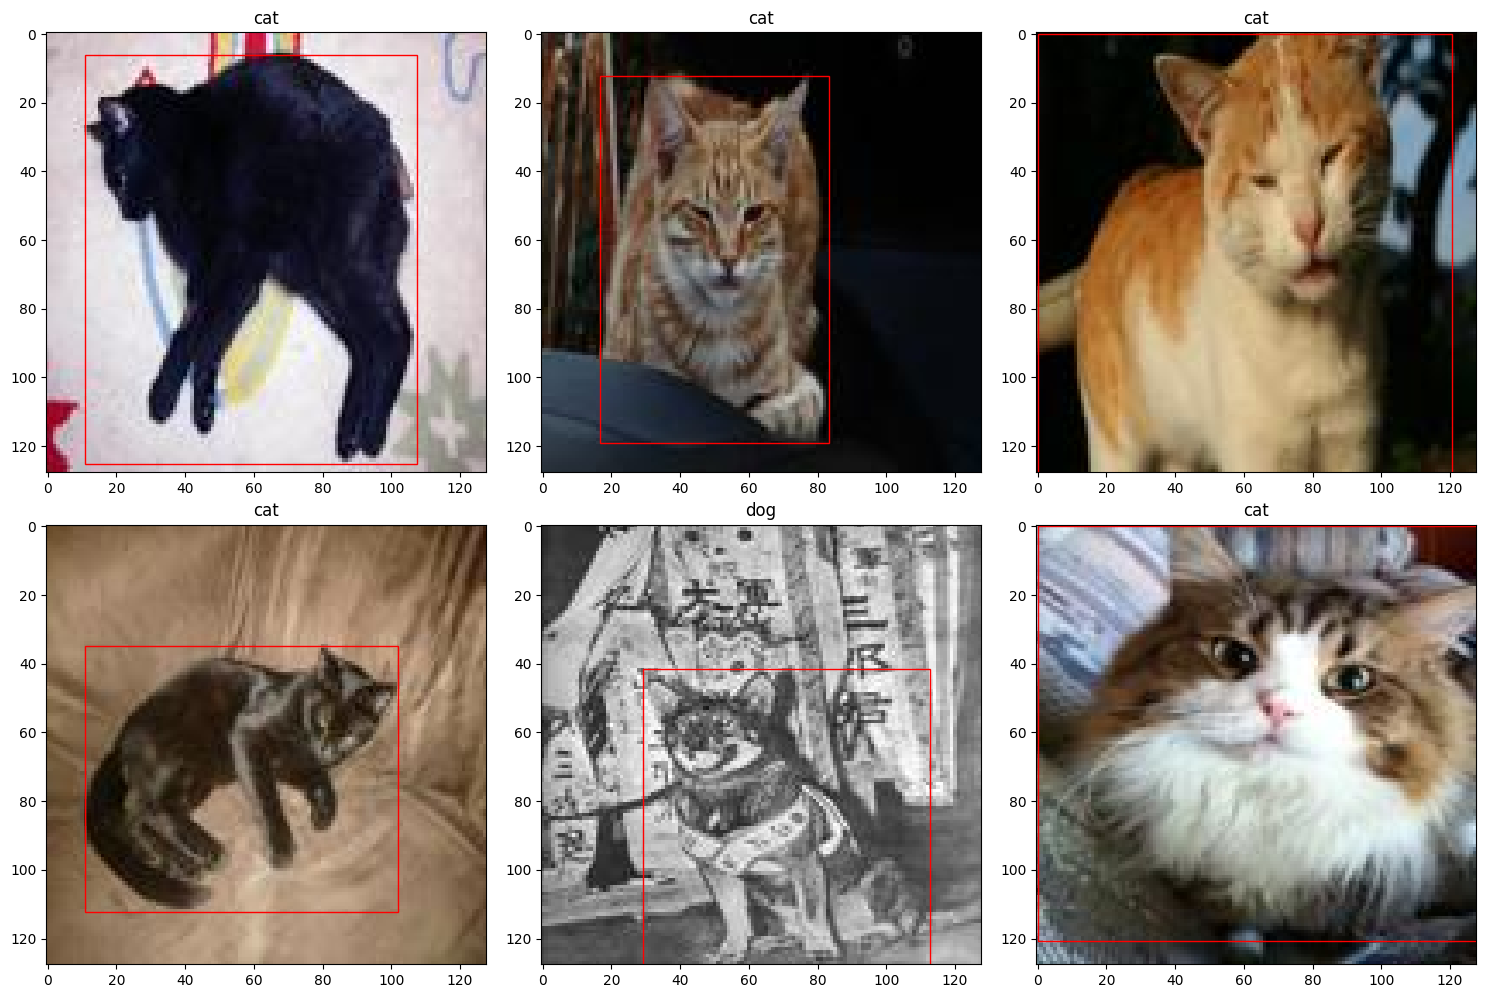

In [48]:
# plot random 6 images
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False,figsize=(15,10))
ax = ax.flatten()

for i,j in enumerate(np.random.choice(df.shape[0], size=6, replace=False)):
    img = mpimg.imread(path+'/resized/'+df.ImageID.values[j]+'.jpg')
    h, w = img.shape[:2]
    coords = df.iloc[j,4:8]
    ax[i].imshow(img)
    ax[i].set_title(df.iloc[j,2])
    ax[i].add_patch(plt.Rectangle((coords[0]*w, coords[2]*h), 
                                  coords[1]*w-coords[0]*w, coords[3]*h-coords[2]*h, 
                                  edgecolor='red', facecolor='none'))

plt.tight_layout()
plt.show()

In [49]:
# encode labels
df['Label'] = (df.LabelName == 'dog').astype(np.uint8)

Plot data to show how resizing normalizes the distribution

  0%|          | 0/12966 [00:00<?, ?it/s]

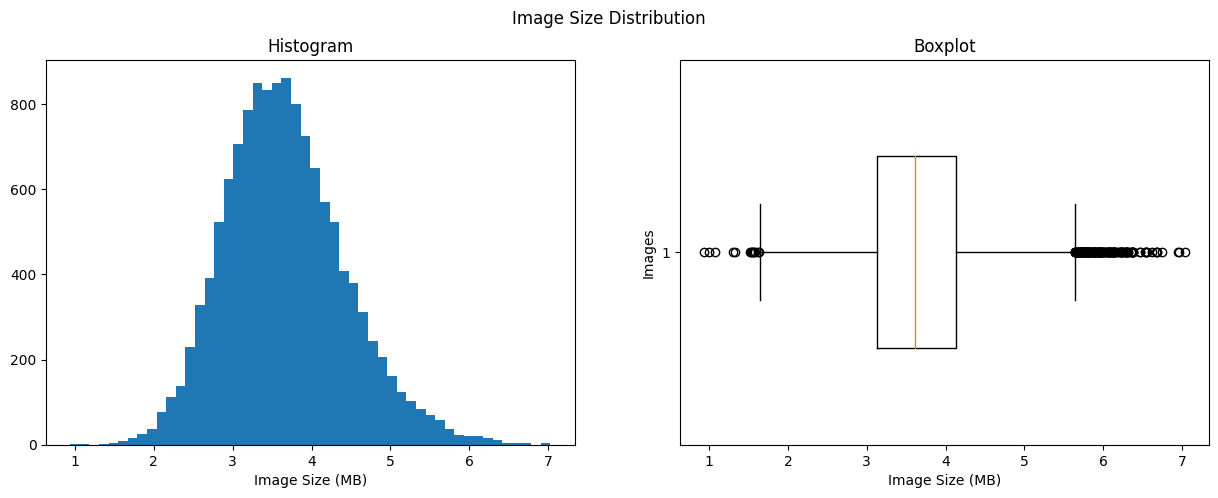

In [50]:
path1 = '../images/resized'
img_shape1 = []
img_size1 = np.zeros((df.shape[0], 1))

for i,f in enumerate(tqdm(glob.glob1(path1, '*.jpg'))):
    file = path1+'/'+f
    img = Image.open(file)
    img_shape1.append(f"{img.size[0]}x{img.size[1]}")
    img_size1[i] += os.path.getsize(file)


img_shape1_count = Counter(img_shape1)
# create a dataframe for image shapes
img_df1 = pd.DataFrame(set(img_shape1_count.items()), columns=['img_shape','img_count'])
img_size1 = img_size1 / 1000

fig, ax = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Image Size Distribution')
ax[0].hist(img_size1, bins=50)
ax[0].set_title('Histogram')
ax[0].set_xlabel('Image Size (MB)')
ax[1].boxplot(img_size1, vert=False, widths=0.5)
ax[1].set_title('Boxplot')
ax[1].set_xlabel('Image Size (MB)')
ax[1].set_ylabel('Images')
plt.show()

## Checkpoint and Save data

In [51]:
# mkdir -p data

In [52]:
np.save('data/img.npy', img_arr.astype(np.uint8))
np.save('data/y_label.npy', df.Label.values)
np.save('data/y_bbox.npy', df[['XMin', 'YMin', 'XMax', 'YMax']].values.astype(np.float32))

# Baseline in SKLearn

## Load data

In [53]:
X = np.load('data/img.npy', allow_pickle=True)
y_label = np.load('data/y_label.npy', allow_pickle=True)
y_bbox = np.load('data/y_bbox.npy', allow_pickle=True)

In [54]:
idx_to_label = {1:'dog', 0:'cat'} # encoder

Double check that it loaded correctly

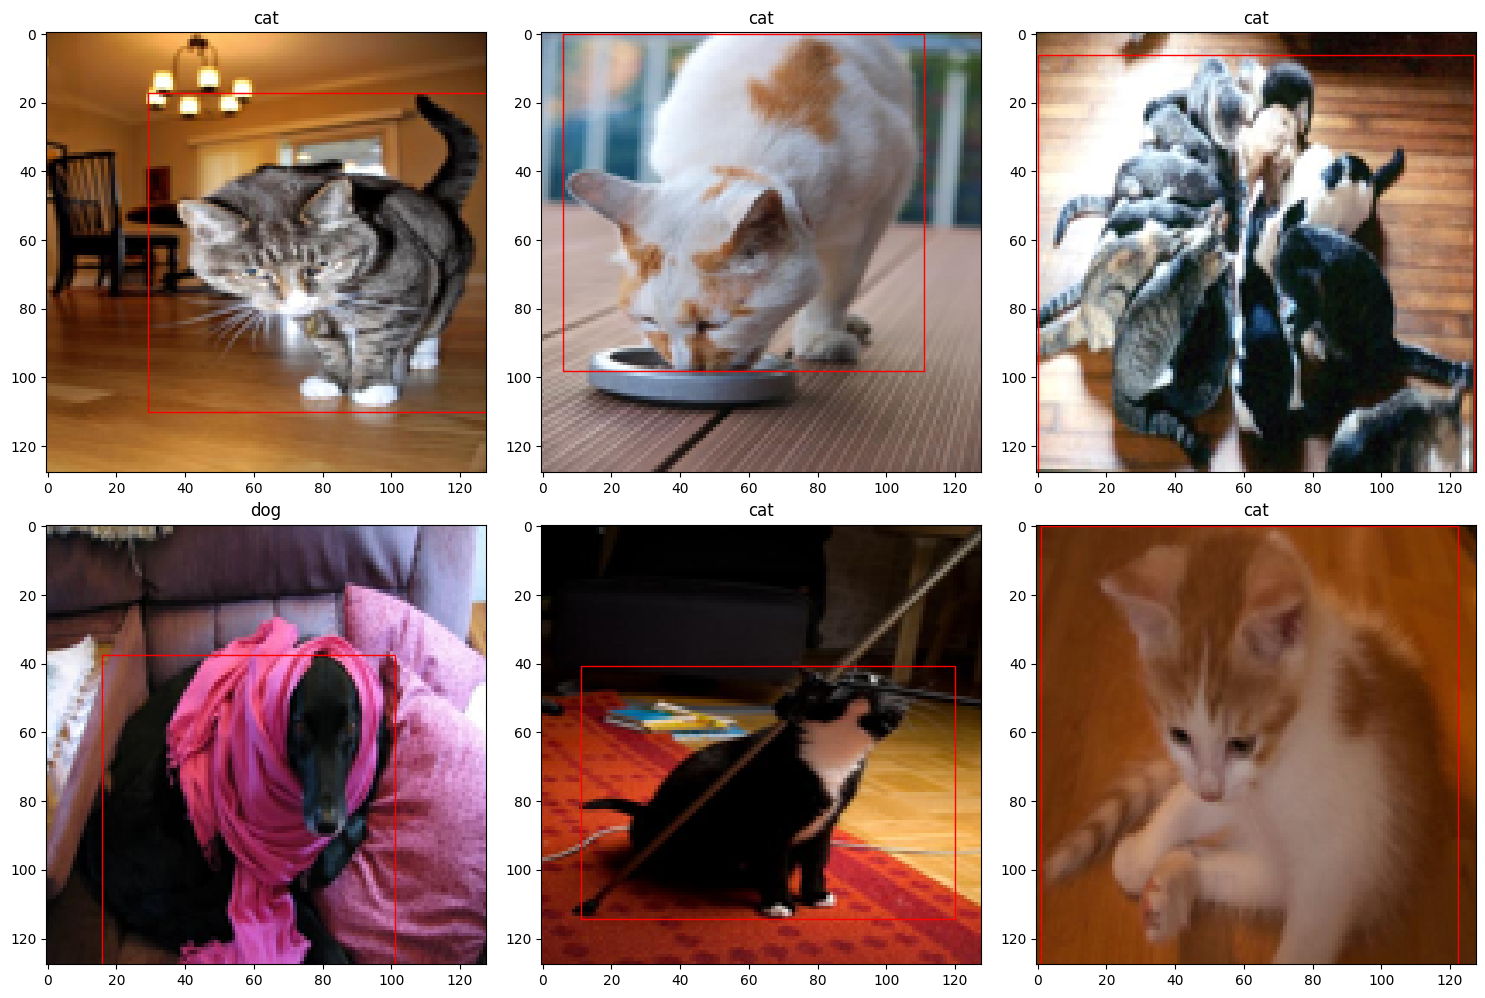

In [55]:
# plot random 6 images
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False,figsize=(15,10))
ax = ax.flatten()

for i,j in enumerate(np.random.choice(X.shape[0], size=6, replace=False)):
    coords = y_bbox[j] * 128
    ax[i].imshow(X[j].reshape(128,128,3))
    ax[i].set_title(idx_to_label[y_label[j]])
    ax[i].add_patch(plt.Rectangle((coords[0], coords[1]), 
                                  coords[2]-coords[0], coords[3]-coords[1], 
                                  edgecolor='red', facecolor='none'))

plt.tight_layout()
plt.show()

## Classification

### Split data

Create training and testing sets to avoid data leakage

In [56]:
X_train, X_test, y_train, y_test_label = train_test_split(X, y_label, test_size=0.01, random_state=27)

### Train

I'm choosing `SGDClassifier` because the data is large and I want to be able to perform stochastic gradient descent and also its ability to early stop. With this many parameters, a model can easily overfit so it's important to try and find the point of where it begins to overfit and stop for optimal results.

In [57]:
%%time
model1 = SGDClassifier(loss='log', n_jobs=-1, random_state=27, learning_rate='adaptive', eta0=1e-10, 
                      early_stopping=True, validation_fraction=0.1, n_iter_no_change=3)
# 0.2 validation TODO
model1.fit(X_train, y_train)

c:\Users\genev\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


CPU times: total: 20.5 s
Wall time: 47.9 s


SGDClassifier(early_stopping=True, eta0=1e-10, learning_rate='adaptive',
              loss='log', n_iter_no_change=3, n_jobs=-1, random_state=27)

In [58]:
model1.n_iter_

6

Did it stop too early? Let's retrain with a few more iterations to see. Note that `SGDClassifier` has a parameter called `validation_fraction` which splits a validation set from the training data to determine when it stops.

In [59]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=27)

In [60]:
model2 = SGDClassifier(loss='log', n_jobs=-1, random_state=27, learning_rate='adaptive', eta0=1e-10)

epochs = 30

train_acc = np.zeros(epochs)
valid_acc = np.zeros(epochs)
for i in tqdm(range(epochs)):
    model2.partial_fit(X_train, y_train, np.unique(y_train))
    
    #log
    train_acc[i] += np.round(accuracy_score(y_train, model2.predict(X_train)),3)
    valid_acc[i] += np.round(accuracy_score(y_valid, model2.predict(X_valid)),3)

  0%|          | 0/30 [00:00<?, ?it/s]

c:\Users\genev\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


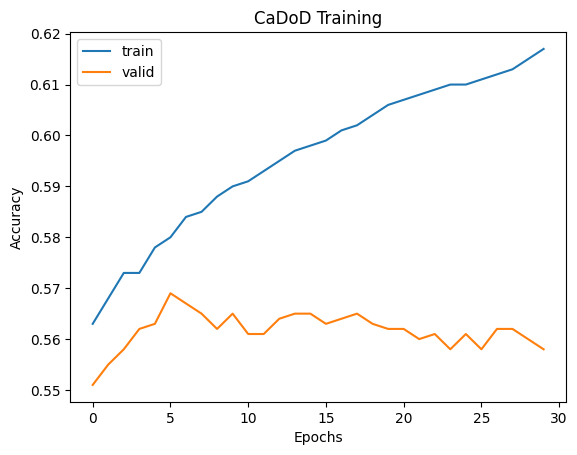

In [61]:
plt.plot(train_acc, label='train')
plt.plot(valid_acc, label='valid')
plt.title('CaDoD Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [62]:
del model2

### Evaluation

In [63]:
expLog = pd.DataFrame(columns=["exp_name", 
                               "Train Acc", 
                               "Valid Acc",
                               "Test  Acc",
                               "Train MSE", 
                               "Valid MSE",
                               "Test  MSE",
                              ])

In [64]:
exp_name = "Baseline: Linear Model (SGD Log Loss)"
accuracy_scores = [
    np.round(accuracy_score(y_train, model1.predict(X_train)), 3),
    np.round(accuracy_score(y_valid, model1.predict(X_valid)), 3),
    np.round(accuracy_score(y_test_label, model1.predict(X_test)), 3)
]
log_entry = [exp_name] + accuracy_scores

# Ensure 'expLog' DataFrame exists and has the correct structure
column_names = ['Experiment Name', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy']
if 'expLog' not in locals():
    expLog = pd.DataFrame(columns=column_names)
else:
    # If 'expLog' exists but has a different structure, adjust it accordingly
    expLog = expLog.reindex(columns=column_names, fill_value=np.nan)
new_index = len(expLog)
expLog.loc[new_index] = log_entry  # Use .loc[new_index] to avoid the mismatch error


In [65]:
expLog

Experiment Name  Train Accuracy  Validation Accuracy  \
0  Baseline: Linear Model (SGD Log Loss)           0.575                0.579   

   Test Accuracy  
0          0.615

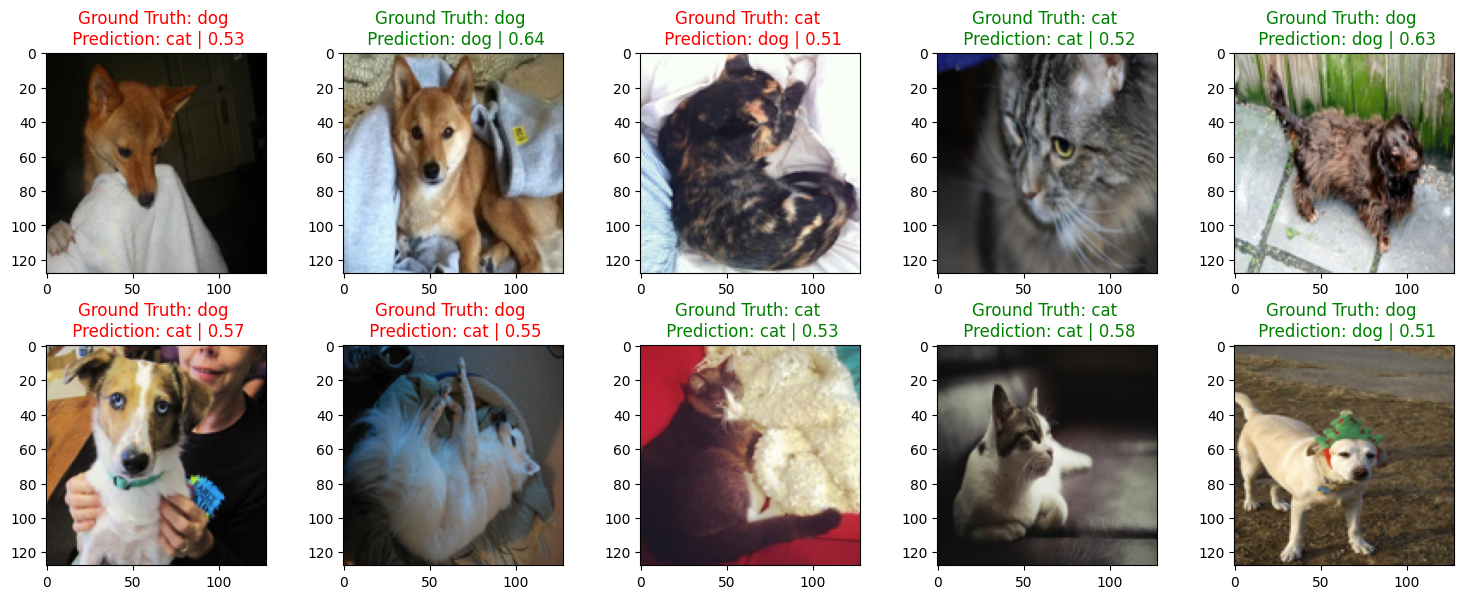

In [66]:
y_pred_label = model1.predict(X_test)
y_pred_label_proba = model1.predict_proba(X_test)

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=False, sharey=False,figsize=(15,6))
ax = ax.flatten()

for i in range(10):
    img = X_test[i].reshape(128,128,3)
    ax[i].imshow(img)
    ax[i].set_title("Ground Truth: {0} \n Prediction: {1} | {2:.2f}".format(idx_to_label[y_test_label[i]],
                                                                   idx_to_label[y_pred_label[i]],
                                                                   y_pred_label_proba[i][y_pred_label[i]]),
                   color=("green" if y_pred_label[i]==y_test_label[i] else "red"))

plt.tight_layout()
plt.show()

## Regression with multiple targets $[y_1, y_2, y_3, y_4]$

Train a linear regression model on multiple target values $[y_1, y_2, y_3, y_4]$ corresponding to [x, y, w, h] of the bounding box containing the object of interest. For more details see [SKLearn's manpage on LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

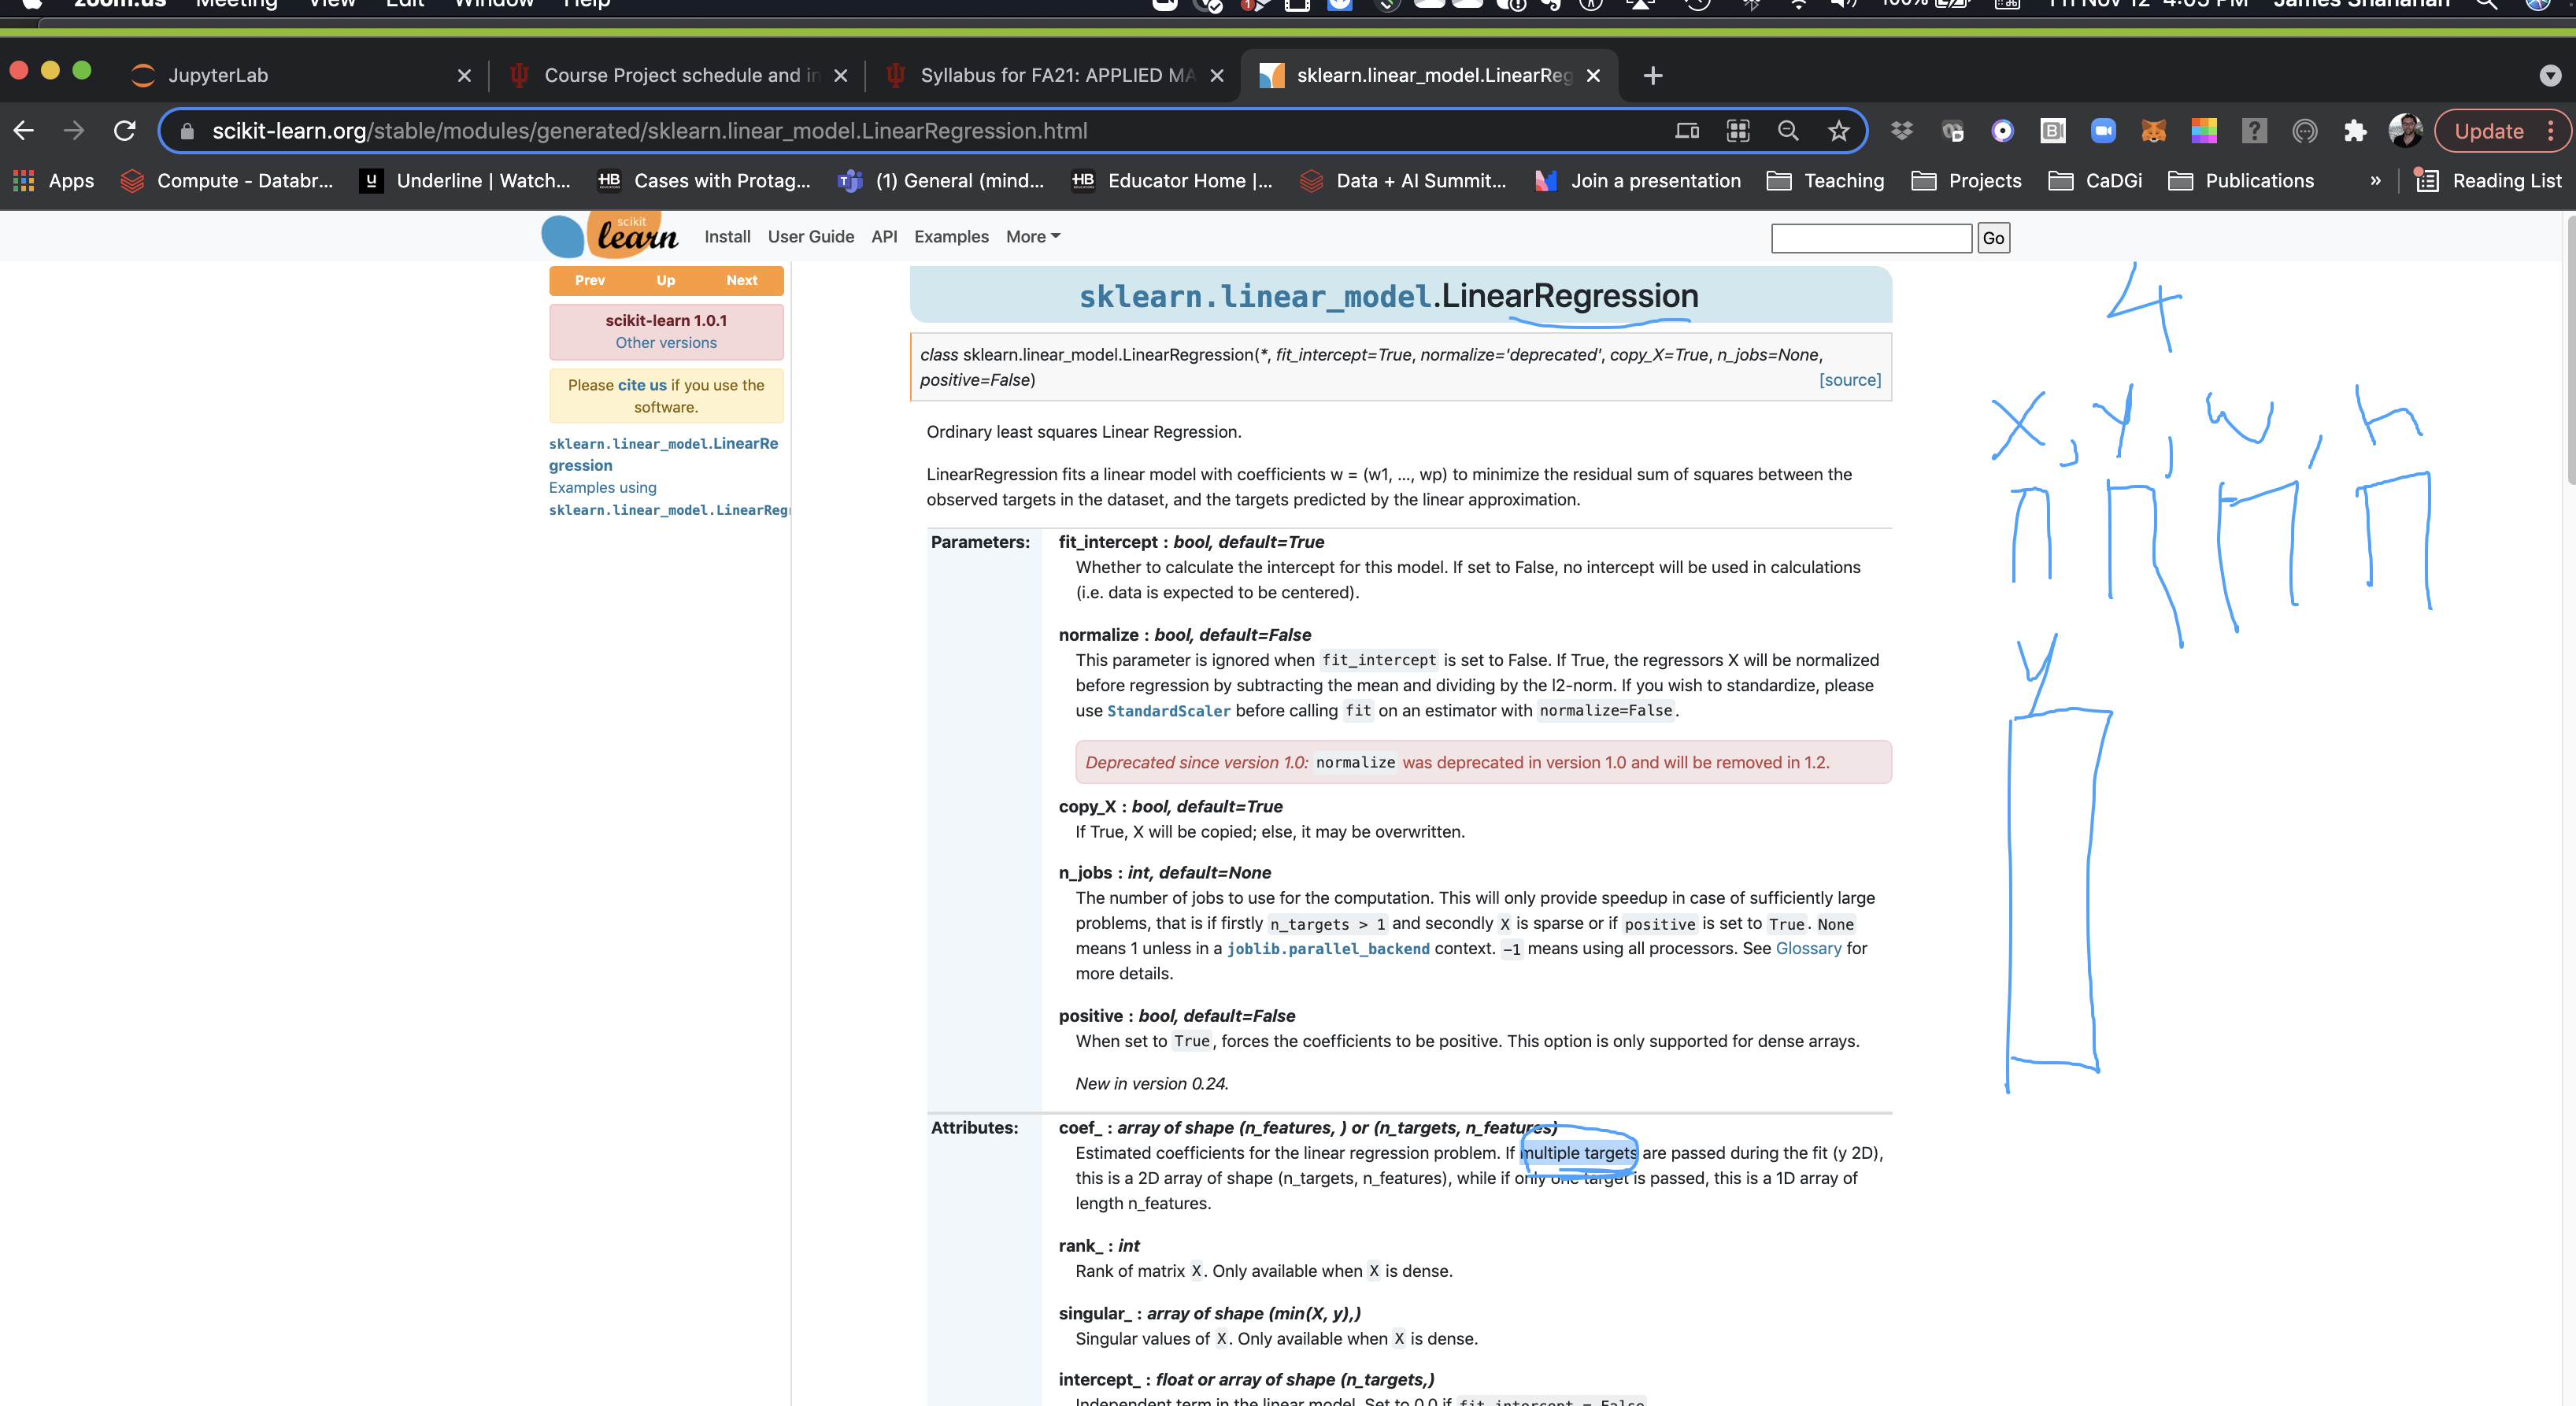### Split data

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y_bbox, test_size=0.01, random_state=27)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=27)

### Train

In [68]:
%%time

from sklearn.linear_model import LinearRegression, Lasso, Ridge
# TODO closed loop solution, could use Lasso Ridge
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)

# might take a few minutes to train
#CPU times: user 1h 26min 40s, sys: 5min 53s, total: 1h 32min 34s
#Wall time: 17min 24s

CPU times: total: 1h 16min 12s
Wall time: 26min 30s


LinearRegression(n_jobs=-1)

### Evaluation

In [71]:
exp_name_mse = "Experiment: Regression Model"
mse_scores = [
    np.round(mean_squared_error(y_train, model.predict(X_train)), 3),
    np.round(mean_squared_error(y_valid, model.predict(X_valid)), 3),
    np.round(mean_squared_error(y_test, model.predict(X_test)), 3)
]
log_entry = [exp_name_mse] + mse_scores

# Ensure 'expLog' DataFrame exists and has the correct structure
column_names = ['Experiment Name', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy']
if 'expLog' not in locals():
    expLog = pd.DataFrame(columns=column_names)
else:
    # If 'expLog' exists but has a different structure, adjust it accordingly
    expLog = expLog.reindex(columns=column_names, fill_value=np.nan)
new_index = len(expLog)
expLog.loc[new_index] = log_entry 
expLog

Experiment Name  Train Accuracy  Validation Accuracy  \
0  Baseline: Linear Model (SGD Log Loss)           0.575                0.579   
1  Baseline: Linear Model (SGD Log Loss)           0.000                0.037   
2           Experiment: Regression Model           0.000                0.037   

   Test Accuracy  
0          0.615  
1          0.036  
2          0.036

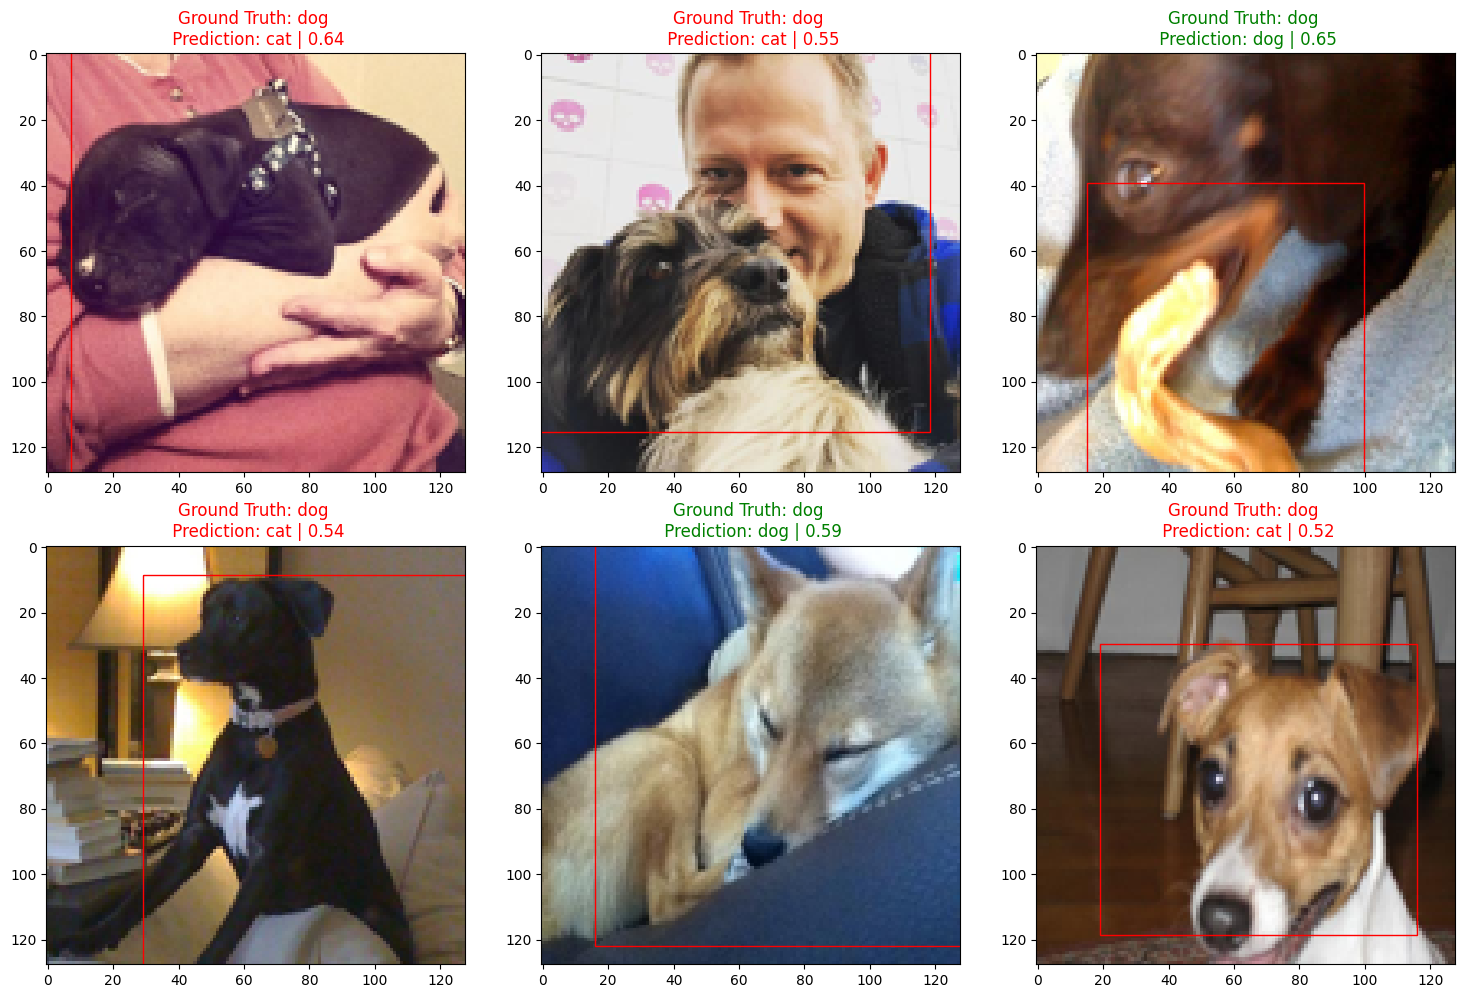

In [72]:
y_pred_bbox = model.predict(X_test)

fig, ax = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False,figsize=(15,10))
ax = ax.flatten()

for i,j in enumerate(np.random.choice(X_test.shape[0], size=6, replace=False)):
    img = X_test[j].reshape(128,128,3)
    coords = y_pred_bbox[j] * 128
    ax[i].imshow(img)
    ax[i].set_title("Ground Truth: {0} \n Prediction: {1} | {2:.2f}".format(idx_to_label[y_test_label[j]],
                                                                   idx_to_label[y_pred_label[j]],
                                                                   y_pred_label_proba[j][y_pred_label[j]]),
                   color=("green" if y_pred_label[j]==y_test_label[j] else "red"))
    ax[i].add_patch(plt.Rectangle((coords[0], coords[1]), 
                                  coords[2]-coords[0], coords[3]-coords[1], 
                                  edgecolor='red', facecolor='none'))

plt.tight_layout()
plt.show()

### Logistic Regression [stretch goal]

Implement a Homegrown Logistic Regression model. Extend the loss function from CXE to CXE + MSE, i.e., make it a complex multitask loss function where the resulting model   predicts the class and bounding box coordinates at the same time.

In [75]:
class MultiTaskLogisticRegression:
    def __init__(self, lr=0.01, epochs=100, lambda_param=0.5):
        self.lr = lr  # Learning rate
        self.epochs = epochs  # Number of epochs for training
        self.lambda_param = lambda_param  # Balance parameter between CXE and MSE
        self.weights_cls = None  # Weights for the classification task
        self.weights_reg = None  # Weights for the regression task
        self.bias_cls = 0  # Bias for the classification task
        self.bias_reg = np.zeros(4)  # Biases for the regression task (4 bounding box coordinates)
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _log_loss(self, y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    def _mse_loss(self, y_true, y_pred):
        return np.mean(np.square(y_true - y_pred))
    
    def fit(self, X, y_cls, y_reg):
        n_samples, n_features = X.shape
        self.weights_cls = np.zeros(n_features)
        self.weights_reg = np.zeros((n_features, 4))
        
        for _ in range(self.epochs):
            # Forward pass
            model_output_cls = self._sigmoid(np.dot(X, self.weights_cls) + self.bias_cls)
            model_output_reg = np.dot(X, self.weights_reg) + self.bias_reg
            
            # Loss calculation
            loss_cls = self._log_loss(y_cls, model_output_cls)
            loss_reg = self._mse_loss(y_reg, model_output_reg)
            total_loss = self.lambda_param * loss_cls + (1 - self.lambda_param) * loss_reg
            
            # Backward pass (Gradient Descent)
            dw_cls = (1 / n_samples) * np.dot(X.T, (model_output_cls - y_cls))
            db_cls = (1 / n_samples) * np.sum(model_output_cls - y_cls)
            dw_reg = (1 / n_samples) * np.dot(X.T, (model_output_reg - y_reg))
            db_reg = (1 / n_samples) * np.sum(model_output_reg - y_reg, axis=0)
            
            # Update weights and biases
            self.weights_cls -= self.lr * dw_cls
            self.bias_cls -= self.lr * db_cls
            self.weights_reg -= self.lr * dw_reg
            self.bias_reg -= self.lr * db_reg
            
            # Optional: Print the total loss every few epochs
            
    def predict_cls(self, X):
        # Predict class labels
        return self._sigmoid(np.dot(X, self.weights_cls) + self.bias_cls) >= 0.5
    
    def predict_reg(self, X):
        # Predict bounding box coordinates
        return np.dot(X, self.weights_reg) + self.bias_reg


# Results / Discussion

# Conclusion